# Root finding & Interpolation summary
* we know how the algorithms work 
  * Bisection
  * Newton Rapson
* in real situations we use:
  * scipy.optimize.brentq (kind of bisection)
  * scipy.optimize.newton (Newton-Rapson)

# 1. Learn how to write functions
# 2. Almost identical task will be at the partial exam #2
# 3. Analyse this class

In [1]:
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt

3.3166247903554

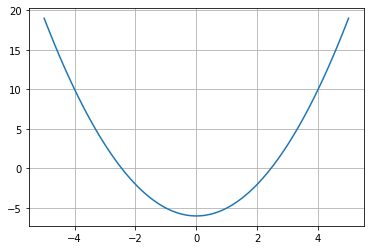

In [2]:
def f_cost(x):
    return x**2-6

import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5,5,100)
fig,ax = plt.subplots(1,1)
ax.plot(x,f_cost(x))
ax.grid('True')
np.sqrt(11)

In [3]:
import scipy.optimize as optimize
root = optimize.brentq(f_cost, -4, 0) # args=(N0,T,omega) # args to the function

In [4]:
print(root)

-2.4494897427828524


In [5]:
root = optimize.newton(f_cost, -4)

In [6]:
print(root)

-2.4494897427831783


In [7]:
def f_cost(x,c):
    return x**2-c

3.3166247903554

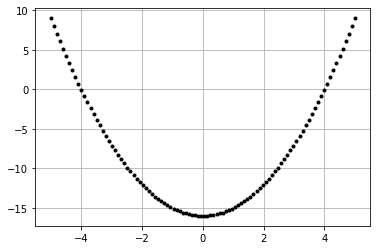

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5,5,100)
fig,ax = plt.subplots(1,1)
ax.plot(x,f_cost(x,16),'.k')
ax.grid('True')
np.sqrt(11)

In [9]:
c=16
root = optimize.brentq(f_cost, -4, 0,args=(c,)) # args=(N0,T,omega) # args to the function

In [10]:
print(root)

-4.0


In [11]:
root = optimize.newton(f_cost, -4,args=(c,))

In [12]:
print(root)

-4.0


3.3166247903554

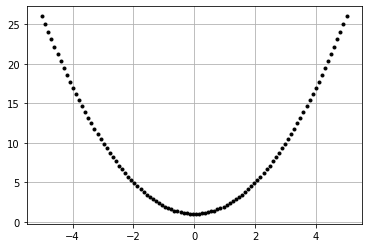

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5,5,100)
fig,ax = plt.subplots(1,1)
ax.plot(x,f_cost(x,-1),'.k')
ax.grid('True')
np.sqrt(11)

# but what if the function does not have roots??? - ERROR

In [16]:
c=-1
root = optimize.brentq(f_cost, -4, 0,args=(c,)) # args=(N0,T,omega) # args to the function

ValueError: f(a) and f(b) must have different signs

In [17]:
root = optimize.newton(f_cost, 10,args=(c,))

RuntimeError: Failed to converge after 50 iterations, value is -0.33199495301128945.

# How to manage error using `try/except` method!!!:


# Lets focus on Newton-Rapson...

In [18]:
def f_cost(x,c):
    return x**2-c

In [19]:
c=-1
try:
    root = optimize.newton(f_cost, 10,args=(c,))
except:
    root=np.nan

In [20]:
print(root)

nan


In [21]:
def my_root_newton(f_cost,start,c): 
    try:
        root = optimize.newton(f_cost, start,args=(c,))
    except:
        root=np.nan
    return root

In [22]:
c_vec=np.linspace(-20,20,10)

results=[]
start=10
for c in c_vec:
    try:
        root = my_root_newton(f_cost,start,c)
    except:
        root=np.nan
        
    results.append(root)
    

Text(0, 0.5, 'root')

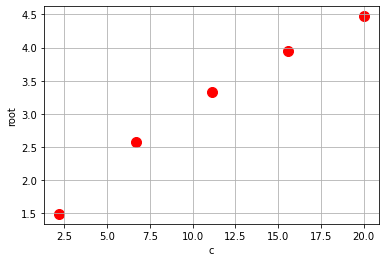

In [45]:
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
#ax.plot(c_vec,results,'.k')
ax.scatter(c_vec,results,s=100,c='r')
ax.grid('True')
ax.set_xlabel('c')
ax.set_ylabel('root')

### In the graph above I have all the values of the roots for different value of `c` in my function `f_cost`

# Now I can interpolate the points from the dataset. I can convert the results into a numpy array first 

In [24]:
from scipy.interpolate import interp1d

In [25]:
x=np.array(c_vec)
y=np.array(results)

In [26]:
x

array([-20.        , -15.55555556, -11.11111111,  -6.66666667,
        -2.22222222,   2.22222222,   6.66666667,  11.11111111,
        15.55555556,  20.        ])

In [27]:
y

array([       nan,        nan,        nan,        nan,        nan,
       1.49071198, 2.5819889 , 3.33333333, 3.94405319, 4.47213595])

# but I cant interpolate `y` because it has `nan` so I must eliminate them first using `mask`

### using function ~np.isnan() I will know what indices are NOT-NAN

In [28]:

idx = ~np.isnan(y)

In [29]:
idx

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

## using this indices I can filter the nan values and have new vectors x, y without nan

In [30]:
x=x[idx]

In [31]:
y=y[idx]

In [32]:
x

array([ 2.22222222,  6.66666667, 11.11111111, 15.55555556, 20.        ])

In [33]:
y

array([1.49071198, 2.5819889 , 3.33333333, 3.94405319, 4.47213595])

In [34]:
f_spline = interp1d(x, y, kind='cubic')

In [35]:
xinterp=np.linspace(np.min(x),np.max(x),30)
yinterp=f_spline(xinterp)

Text(0, 0.5, 'root')

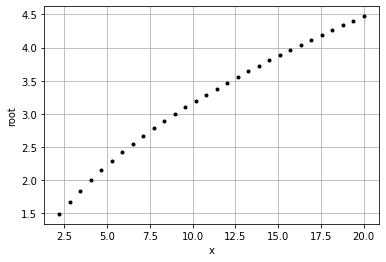

In [36]:
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.plot(xinterp,yinterp,'.k')
ax.grid('True')
ax.set_xlabel('x')
ax.set_ylabel('root')

# Final verions of interpolation: using function

In [41]:
def my_interp_spline(x,y,xinterp):
    idx = ~np.isnan(y)
    x=x[idx]
    y=y[idx]
    f_spline = interp1d(x, y, kind='cubic')
    yinterp=f_spline(xinterp)
    return yinterp

## or even better because its more flexible

In [42]:
def my_interp_spline(x,y,xinterp,kind):
    idx = ~np.isnan(y)
    x=x[idx]
    y=y[idx]
    f_spline = interp1d(x, y, kind=kind)
    yinterp=f_spline(xinterp)
    return yinterp

# interpolation points I can get using my function `my_interp_spline`

In [43]:
yinterp=my_interp_spline(x,y,xinterp,'cubic')

Text(0, 0.5, 'root')

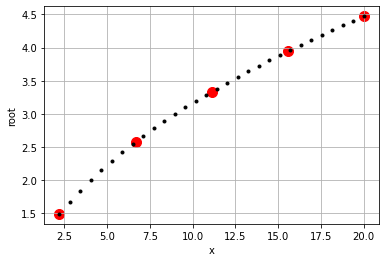

In [44]:
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.scatter(x,y,s=100,c='r')

ax.plot(xinterp,yinterp,'.k')
ax.grid('True')
ax.set_xlabel('x')
ax.set_ylabel('root')